# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [2]:
xlsx = pd.ExcelFile('European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
print(data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [3]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

The population of the first generation: 
[[9625 4595 3476 2446]
 [3645 8943 4072 9655]
 [3700 8384 5812 1806]
 ...
 [3304 6243  851  163]
 [4161 3347 3097 1985]
 [4147 1205 8115  749]]

Evolution:
Generation =  0 	Best fitness =  118324707409.29472
Generation =  1 	Best fitness =  70718324032.20312
Generation =  2 	Best fitness =  35817885175.6822
Generation =  3 	Best fitness =  35817885175.6822
Generation =  4 	Best fitness =  22787375981.07664
Generation =  5 	Best fitness =  15974679924.11353
Generation =  6 	Best fitness =  12236466823.39418
Generation =  7 	Best fitness =  12236466823.39418
Generation =  8 	Best fitness =  10512256691.54172
Generation =  9 	Best fitness =  9346568115.20904
Generation =  10 	Best fitness =  6350054465.90787
Generation =  11 	Best fitness =  6350054465.90787
Generation =  12 	Best fitness =  6067895919.07715
Generation =  13 	Best fitness =  6067895919.07715
Generation =  14 	Best fitness =  3929714491.59333
Generation =  15 	Best fitness =  292758

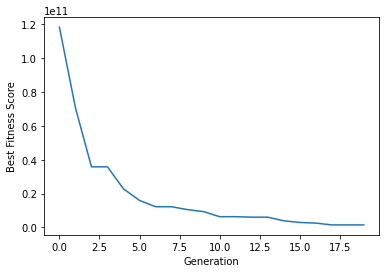

In [4]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])
print("Best solution fitness: ", round(1/np.max(fitness), 5))

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Challenge 231 (_max score - 50 points_)
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

### Solution
As seen below, we can see that the results with the new algorithm provides much better fitness score (30,883,452~ vs.  235,627,459~ in the previous "naive" GA).

The modifications I've performed:
1. Biased selection - I divided the fittness score per sample by total fitness score sum to create probability for selection
2. Recombination uses actual 2 random parents and also select random with-in chromosome selections from each parent.
3. Muration now has a defined probability (0.3 by default), in addition the mutated feature is mutation in one of two options: in 70% of the mutations I'll use a gaussian based on the other feature values and the mutated values will be based on this gaussian, in the other 30% of the cases, we will mutate based on a random int between -100 to +100. I figured this makes more sense as always seeting the second option as the default mutation might slow the convergence.
4. Stopping criterea - I've added early stop based on no improvements in the last X generations (default to 15 generations).
5. I've increased the number of solutions we start with, and added additional generations.


In [5]:
# Your code here

def fitness_function2(data, pop):
    fitness = []
    for solution in range(len(pop)):
        error = 0
        for event in range(len(data)):
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection2(pop, fitness, num_parents):
    # Divide fittness score by total fitness sum to create probability for selection
    fitness_proba = np.array(fitness) / np.sum(fitness)
    parent_weighted_selection = np.random.choice(range(fitness_proba.shape[0]), replace=False, size=num_parents, p=fitness_proba)
    return pop[parent_weighted_selection]


def recombination2(parents, offspring_size):
    offspring = np.empty(offspring_size)

    for k in range(offspring_size[0]):
        # Choose two random parents
        parent1_idx, parent2_idx = np.random.choice(range(parents.shape[0]), size=2)
        # Get parents chromosomes
        parent1_chromos = parents[parent1_idx]
        parent2_chromos = parents[parent2_idx]
        
        # Create temp offspring
        offsprint_chromos = np.zeros(offspring_size[1])
        # Choose the random chromosomes from parent 1
        p1_chromos_in_combo_idx = np.random.randint(2, size=parent1_chromos.shape)
        offsprint_chromos = p1_chromos_in_combo_idx * parent1_chromos
        # Choose the random chromosomes from parent 2 (those who not selected from parent 1)
        p2_chromos_in_combo_idx = np.ones(parent2_chromos.shape, dtype=np.int64) - p1_chromos_in_combo_idx
        offsprint_chromos += p2_chromos_in_combo_idx * parent2_chromos
        # Update offspring array
        offspring[k] = offsprint_chromos
    return offspring

def mutation2(offspring_recombination, mutation_proba=0.3, use_gaussian_proba=0.7):
    features_mean = np.mean(offspring_recombination, axis=1)
    features_std = np.std(offspring_recombination, axis=1)
    # We create murations now with mutation probability and not mutate each sample
    for idx in range(offspring_recombination.shape[0]):
        if not np.random.choice([True, False], 1, p=[mutation_proba, 1 - mutation_proba])[0]:
            # This means we did not choose to mutate the sample
            continue

        # Choose feature index to mutate
        random_index = np.random.randint(0, offspring_recombination.shape[1],1)

        if np.random.choice([True, False], 1, p=[use_gaussian_proba, 1 - use_gaussian_proba])[0]:
            # Pick random value based on the gaussian of the current offspring's feature values
            random_val = np.random.normal(features_mean[random_index], features_std[random_index])
        else:
            # At lower proba - pick a random number not just in the gaussian range
            random_val = np.random.randint(-100, 100, 1)
        
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_val
    return offspring_recombination


The population of the first generation: 
[[3179  294 8926 2096]
 [5492 8667 9578 8204]
 [9040 4523 1895 7747]
 ...
 [9835 6160 7262 9664]
 [3061  101 1213 5795]
 [2541 2545 2214 4803]]

Evolution:
Generation =  0 	Best fitness =  149370498266.69818
Generation =  1 	Best fitness =  130732457127.19872
Generation =  2 	Best fitness =  115695162809.73775
Generation =  3 	Best fitness =  81485795120.28256
Generation =  4 	Best fitness =  19188642063.26605
Generation =  5 	Best fitness =  19188642063.26605
Generation =  6 	Best fitness =  12844989303.23683
Generation =  7 	Best fitness =  4749005196.11645
Generation =  8 	Best fitness =  4749005196.11645
Generation =  9 	Best fitness =  4749005196.11645
Generation =  10 	Best fitness =  1461213993.29255
Generation =  11 	Best fitness =  1170459458.04864
Generation =  12 	Best fitness =  306023533.53325
Generation =  13 	Best fitness =  162640618.5605
Generation =  14 	Best fitness =  162640618.5605
Generation =  15 	Best fitness =  63627447.

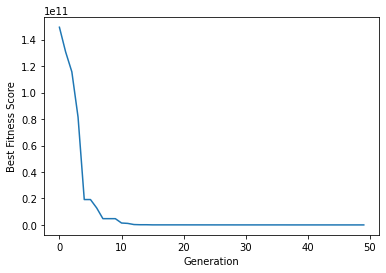

In [6]:
# GA Parameters
formula_degree = 4
number_of_solutions = 1000
number_of_parents = 500
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 50
best_outputs = []

# Used for smarter stopping criteria (early stopping if we did not improve for X generations) where improvement needs to be greater than 0.01
best_fitness = np.inf
generations_no_improvement = 0
early_stop_threshold = 15 # Stop if did not improve for X generations

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):
    fitness = fitness_function2(data, new_population)
    
    # Early stopping smarter criteas
    current_best_fitness = 1/np.max(fitness)

    if best_fitness - current_best_fitness > 0.01:
        best_fitness = current_best_fitness
        generations_no_improvement = 0
    else:
        generations_no_improvement += 1
    
    if generations_no_improvement == early_stop_threshold:
        print(f"Stopping after {generation} generations without improvement (no improvement in the last {early_stop_threshold} generations).")
        break
     
    print("Generation = ", generation, "\tBest fitness = ", round(current_best_fitness,5))
    best_outputs.append(round(1/np.max(fitness), 5))
    parents = biased_selection2(new_population, fitness, number_of_parents)
    offspring_recombination = recombination2(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation2(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function2(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])
print("Best solution fitness: ", round(1/np.max(fitness), 5))

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in HW1.

/var/folders/hp/1nwbq3_d6233ql5yg61wlxg02r6qjf/T/ipykernel_15998/3183303800.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


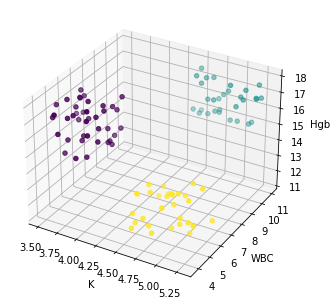

In [7]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

xlsx = pd.ExcelFile('EMR-Blood.xlsx')
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Challenge 232 (_max score - 50 points_)
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

In [20]:
def fitness_function3(points, 
                      clusters, 
                      bcss_weight=1, 
                      wcss_weight=50, 
                      small_clusters_penalty_weight=10, 
                      clusters_count_penalty_weight=10):
    fitness = []

    for sol_idx in range(len(clusters)):        
        # The current solution suggested clusters
        solution = clusters[sol_idx]
        # Current solution centroids
        centroids = []
        # Cluster sizes per cluster
        cluster_sizes = []
        # Current WCSS
        wcss = 0
        # Penalty for current solution small clusters
        small_clusters_penalty = 0
        # Penalty for current solution number of clusters
        clusters_count_penalty = np.unique(solution).shape[0]

        # Evaluating the within clusters sum of squares (WCSS) per cluster
        for cluster in np.unique(solution):
            points_in_cluster = points[solution == cluster]
            centroid_point = np.mean(np.array(points_in_cluster), axis=0)            
            wcss += np.linalg.norm(points_in_cluster - centroid_point)
            
            # Add penalty for small clusters
            small_clusters_penalty += 1/points_in_cluster.shape[0]
            
            # Saving current cluster centroids and cluster size (used in BCSS)
            centroids.append(centroid_point)
            cluster_sizes.append(points_in_cluster.shape[0])

        # Calculating the between clusters sum of squares (BCSS) - I've used the mean per cluster since if we sum them the GA prefers more clusters (since we max BCSS)
        diff_cluster_sq = np.linalg.norm(np.array(centroids) - np.mean(points, axis = 0), axis = 1) ** 2
        final_bcss = np.mean(np.array(cluster_sizes) * diff_cluster_sq)

        # Multiply each value we try to optimize (maximize / minimize) by a given weight, the function default weights got the best result.
        wcss = wcss * wcss_weight
        bcss = final_bcss * bcss_weight
        small_clusters_penalty = small_clusters_penalty * small_clusters_penalty_weight
        clusters_count_penalty = clusters_count_penalty * clusters_count_penalty_weight
        
        # Append the solution's fitness 
        fitness.append((bcss / (wcss  + small_clusters_penalty + clusters_count_penalty))) 
    return fitness

def biased_selection3(clusters, fitness, num_parents):
    # If we just want to take the top X solutions as parents:
    return get_top_k_parents(clusters, fitness, num_parents)

    # Divide fittness score by total fitness sum to create probability for selection
    # fitness_proba = np.array(fitness) / np.sum(fitness)
    # parent_weighted_selection = np.random.choice(range(fitness_proba.shape[0]), replace=False, size=num_parents, p=fitness_proba)
    # return clusters[parent_weighted_selection]

def get_top_k_parents(clusters, fitness, k):
    sorted_fitness_args = np.argsort(fitness)
    return clusters[sorted_fitness_args[-k:],:]


def recombination3(parents, fitness, offspring_size):
    
    offspring = np.empty(offspring_size)
    number_of_parents = parents.shape[0]
    
    # Get the fitness per parent
    fitness_arr = np.array(fitness)
    parents_fitness = fitness_arr[np.argsort(fitness_arr)[-number_of_parents:]]
    # Get the probabillities to select each parent for recombination based on fitness
    fitness_sum = np.sum(parents_fitness)
    parents_proba = parents_fitness / fitness_sum


    for k in range(offspring_size[0]):
        # Choose two random parents based on parents fitness (higher fitness -> Higher selection for recombination)
        parent1_idx, parent2_idx = np.random.choice(range(number_of_parents), size=2 , p=parents_proba)
        # Get parents chromosomes
        parent1_chromos = parents[parent1_idx]
        parent2_chromos = parents[parent2_idx]        
        # Create temp offspring
        offsprint_chromos = np.zeros(offspring_size[1])
        # Choose the random chromosomes from parent 1
        p1_chromos_in_combo_idx = np.random.randint(2, size=parent1_chromos.shape)
        offsprint_chromos = p1_chromos_in_combo_idx * parent1_chromos
        # Choose the random chromosomes from parent 2 (those who not selected from parent 1)
        p2_chromos_in_combo_idx = np.ones(parent2_chromos.shape, dtype=np.int64) - p1_chromos_in_combo_idx
        offsprint_chromos += p2_chromos_in_combo_idx * parent2_chromos
        # Update offspring array
        offspring[k] = offsprint_chromos
    return offspring

def mutation3(offspring_recombination, mutation_proba=0.3):
    
    # We create mutations now with mutation probability and not mutate each sample
    for idx in range(offspring_recombination.shape[0]):
        if not np.random.choice([True, False], 1, p=[mutation_proba, 1 - mutation_proba])[0]:
            # This means we did not choose to mutate the sample
            continue
        
        # Get modified solution
        offspring_solution = offspring_recombination[idx]
        
        # Get modified point and new cluster value
        clusters = np.unique(offspring_solution)
        modified_cluster = np.random.choice(clusters, 1)
        modified_point_idx = np.random.choice(np.where(clusters==modified_cluster)[0], 1)
        random_cluster = np.random.choice(clusters[clusters != modified_cluster], 1)        

        # Mutate the sample
        offspring_recombination[idx, modified_point_idx] = random_cluster
    return offspring_recombination



The clusters of the first generation: 
[[1 0 0 ... 1 0 1]
 [1 0 1 ... 0 1 0]
 [1 0 1 ... 0 0 1]
 ...
 [6 6 5 ... 6 1 5]
 [1 2 8 ... 2 5 5]
 [8 8 8 ... 5 7 4]]

Evolution:
Generation =  0 	Best fitness =  63.11611
Generation =  1 	Best fitness =  59.09128
Generation =  2 	Best fitness =  41.05269
Generation =  3 	Best fitness =  41.05269
Generation =  4 	Best fitness =  41.05269
Generation =  5 	Best fitness =  41.05269
Generation =  6 	Best fitness =  41.05269
Generation =  7 	Best fitness =  39.49225
Generation =  8 	Best fitness =  37.15639
Generation =  9 	Best fitness =  37.15639
Generation =  10 	Best fitness =  29.30217
Generation =  11 	Best fitness =  29.30217
Generation =  12 	Best fitness =  21.54442
Generation =  13 	Best fitness =  20.08069
Generation =  14 	Best fitness =  17.07544
Generation =  15 	Best fitness =  15.84688
Generation =  16 	Best fitness =  15.068
Generation =  17 	Best fitness =  13.46194
Generation =  18 	Best fitness =  10.5965
Generation =  19 	Best fi

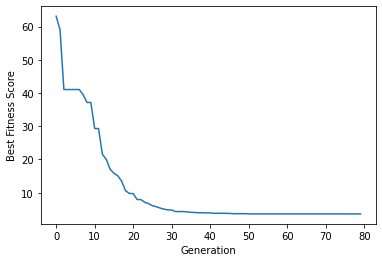

In [23]:
# GA Parameters
points_population = EMR3d1.copy()
number_of_solutions_per_k = 500
number_of_generations = 200
max_clusters = 10
# Used for smarter stopping criteria (early stopping if we did not improve for X generations) where improvement needs to be greater than 0.01
best_fitness = np.inf
generations_no_improvement = 0
early_stop_threshold = 30 # Stop if did not improve for X generations


# Create initial cluster guesses
different_clusters = []

for k in range(2, max_clusters):
    # Create <number_of_solutions_per_k> solutions per each number of clusters
    different_clusters.append(np.random.randint(low=0, high=k, size=(number_of_solutions_per_k, points_population.shape[0])))
cluster_population = np.concatenate(different_clusters)
number_of_parents = round(cluster_population.shape[0] / 2)
number_of_parents_to_keep = round(cluster_population.shape[0] / 10)
population_size = cluster_population.shape

best_outputs = []

# Genesis
print("The clusters of the first generation: ")
print(cluster_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):
    fitness = fitness_function3(points_population, cluster_population)
    
    # Early stopping smarter criteas
    current_best_fitness = 1/np.max(fitness)

    if best_fitness - current_best_fitness > 0.001:
        best_fitness = current_best_fitness
        generations_no_improvement = 0
    else:
        generations_no_improvement += 1
    
    if generations_no_improvement == early_stop_threshold:
        print(f"Stopping after {generation} generations without improvement (no improvement in the last {early_stop_threshold} generations).")
        break
     
    print("Generation = ", generation, "\tBest fitness = ", round(current_best_fitness,5))
    best_outputs.append(round(current_best_fitness, 5))
    parents = biased_selection3(cluster_population, fitness, number_of_parents)
    offspring_recombination = recombination3(parents, fitness, offspring_size=(population_size[0]-number_of_parents_to_keep, parents.shape[1]))
    offspring_mutation = mutation3(offspring_recombination)
    cluster_population[0:number_of_parents_to_keep, :] = get_top_k_parents(cluster_population, fitness, number_of_parents_to_keep)
    cluster_population[number_of_parents_to_keep:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(cluster_population)
fitness = fitness_function3(points_population, cluster_population)
best_match_idx = np.argmax(fitness)
print("Best solution: ", cluster_population[best_match_idx, :])
print("Best solution fitness: ", round(1/np.max(fitness), 5))

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()


/var/folders/hp/1nwbq3_d6233ql5yg61wlxg02r6qjf/T/ipykernel_15998/3183303800.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


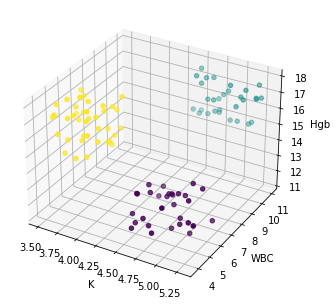

In [24]:
make_chart(EMR3d1, cluster_population[best_match_idx, :], variables1)

As seen above I've managed to get to a reasonable clustering solution within less than 150~ generations (ran it multiple times and I get the same result within less than 150 generations)

The changes I had to do in the algorithm:
1. Samples - I've created a random clusters solution per different number of clusters (so 500 solutions for 2 clusters, 500 solutions for 3 clusters ...), I've limited the maximal clusters to 10 since I think that for 100 samples this is a reasonable limitation.
2. Fitness function - I've modified the fittness function to: BCSS (between clusters sum of squares) / WCSS (within cluster sum of squares) + penalties since we want to maximize the BCSS and minimize the WCSS and the penalties, I added penalties for small size clusters and high number of clusters to try to minimize these as well. I've also added, per of the above fitness function params, a weight which can be used as an hyperparam of the model.
3. Mutation - Mutation selects a single point and modifies it to a different cluster given the existing clusters of the current solution (with mutation probability).
4. I've modified the creation of parents - we use the top 50% to create the children and we keep the top 10% of parents for the next generation as well.

## Challenge 233: Reconstruct Image (Bonus: _max score - 20 points_)
In this part you will attemp to generate an image which is closest to a target image given. 

First we will load the image from a file:


In [ ]:
import matplotlib.image as mpimg

img=mpimg.imread('pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

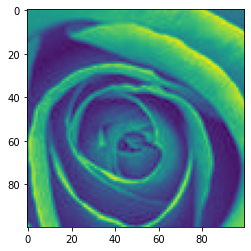

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [ ]:
target = img[100:200,200:300,0]

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don;t worry if it's still noisy...
FYI: GA are not the best solution for these types of problems ;)
You can use these blog posts to give you ideas:
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

In [ ]:
# Your code here